In [1]:
from astropy.table import Table
import numpy as np
import pdb

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

from utils import *

%matplotlib inline
mpl.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [2]:
spectable = Table.read('../data/2017-01-30_emission_line_catalog.csv')
linedict = SDSS_linedict()

In [3]:
spectable.colnames

['Hb_LINEZ',
 'Hb_LINEZ_ERR',
 'Hb_LINESIGMA',
 'Hb_LINESIGMA_ERR',
 'Hb_LINEAREA',
 'Hb_LINEAREA_ERR',
 'Hb_LINEEW',
 'Hb_LINEEW_ERR',
 'Hb_LINECONTLEVEL',
 'Hb_LINECONTLEVEL_ERR',
 'Hb_LINENPIXLEFT',
 'Hb_LINENPIXRIGHT',
 'Hb_LINEDOF',
 'Hb_LINECHI2',
 'OIII5007_LINEZ',
 'OIII5007_LINEZ_ERR',
 'OIII5007_LINESIGMA',
 'OIII5007_LINESIGMA_ERR',
 'OIII5007_LINEAREA',
 'OIII5007_LINEAREA_ERR',
 'OIII5007_LINEEW',
 'OIII5007_LINEEW_ERR',
 'OIII5007_LINECONTLEVEL',
 'OIII5007_LINECONTLEVEL_ERR',
 'OIII5007_LINENPIXLEFT',
 'OIII5007_LINENPIXRIGHT',
 'OIII5007_LINEDOF',
 'OIII5007_LINECHI2',
 'Ha_LINEZ',
 'Ha_LINEZ_ERR',
 'Ha_LINESIGMA',
 'Ha_LINESIGMA_ERR',
 'Ha_LINEAREA',
 'Ha_LINEAREA_ERR',
 'Ha_LINEEW',
 'Ha_LINEEW_ERR',
 'Ha_LINECONTLEVEL',
 'Ha_LINECONTLEVEL_ERR',
 'Ha_LINENPIXLEFT',
 'Ha_LINENPIXRIGHT',
 'Ha_LINEDOF',
 'Ha_LINECHI2',
 'OIII4959_LINEZ',
 'OIII4959_LINEZ_ERR',
 'OIII4959_LINESIGMA',
 'OIII4959_LINESIGMA_ERR',
 'OIII4959_LINEAREA',
 'OIII4959_LINEAREA_ERR',
 'OIII4959_LIN

In [8]:
def Wisnioski_clump_size(sigma):
    """ Wisnioski 2012 Eqn 6: 
        log(σ) = (0.42 ± 0.03) × log(d) + (0.33 ± 0.09) 
    """
    log_size = (np.log10(sigma) - 0.33) / 0.42
    return 10**log_size

/home/oxymoronic/Software/miniconda2/envs/data-env/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt
/home/oxymoronic/Software/miniconda2/envs/data-env/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater_equal


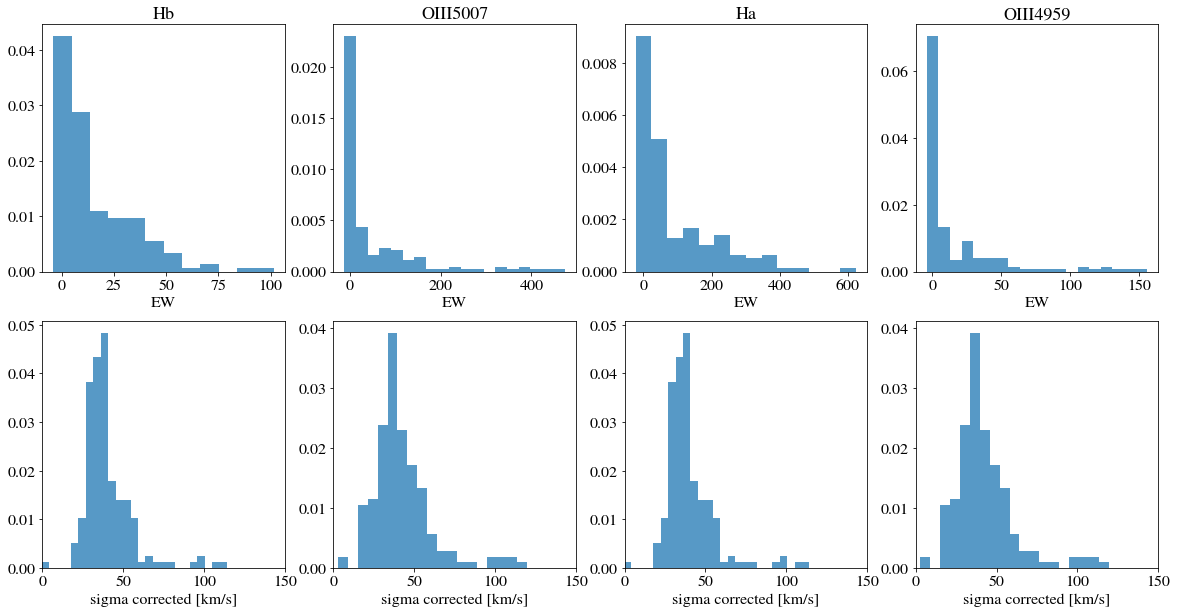

In [20]:
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2,4)

for i, line in enumerate(linedict.keys()):
    
    # ---- Plot EW ----
    ax = fig.add_subplot(gs[i])
    
    ew = spectable[line+'_LINEEW']
    ew = ew[ew>0.]
    
    H, bin_edges = np.histogram(ew, bins='fd', density=True)
    ax.bar(bin_edges[:-1], H, width=bin_edges[1:]-bin_edges[:-1], alpha=0.75)
    ax.set_xlabel('EW')
    
    ax.set_title(line, fontsize=18)
    
    # ---- Plot sigma ----
    ax = fig.add_subplot(gs[i+4])
    
    sig = spectable[line+'_LINESIGMA']
    sig_corr = np.sqrt(sig**2-62.6**2)
    #print np.isnan(sig_corr)
    
    H, bin_edges = np.histogram(sig_corr[sig_corr>=0], bins='auto', density=True)
    ax.bar(bin_edges[:-1], H, width=bin_edges[1:]-bin_edges[:-1], alpha=0.75)
    ax.set_xlabel('sigma corrected [km/s]')
    ax.set_xlim(0, 150)

plt.savefig('ppec_measurements_for_clumpy_gals.png')

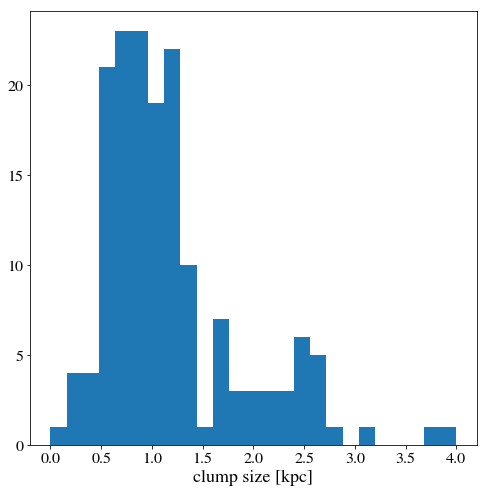

In [24]:
ha_sig = spectable['Ha_LINESIGMA']
ha_sig_corr = np.sqrt(ha_sig**2 - 62.6**2)

clump_sizes = Wisnioski_clump_size(ha_sig_corr) # in pc

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.hist(clump_sizes/1000, bins=25, range=(0,4))
ax.set_xlabel('clump size [kpc]', fontsize=18)